<a href="https://colab.research.google.com/github/Jirathip/pythontest2/blob/master/ALLFUNDProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#locally download file
from google.colab import files
upload = files.upload()

In [0]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read and clean data

import pandas as pd
ALLFUND2 = pd.read_csv('/content/drive/My Drive/FromColab/ALLFUND.csv',
index_col=False,low_memory=False,skipinitialspace=True,names=['Port',
'Date','Time','Security','Issuer','Maturity Date','Rating','Coupon Rate',
'Average Redemtion Yield','Face Value','Cost/Unit','Amortise Cost',
'Market Price','Market Value','%NAV','Average YTM','Duration','%Cap Gain'])
ALLFUND2.loc[:,'Port'] = ALLFUND2.loc[:,'Port'].astype(str).map(str.strip)
ALLFUND2.loc[:,'Issuer'] = ALLFUND2.loc[:,'Issuer'].astype(str).map(str.strip)
ALLFUND2.loc[:,'Duration'] = pd.to_numeric(ALLFUND2.loc[:,'Duration'],errors='coerce')


In [0]:
#Create indexer from header
Sectype=ALLFUND2.Port*ALLFUND2.Port.str.contains('TOTAL')
Sectype = pd.Series(Sectype.unique()).astype(str).str.lstrip('TOTAL').map(str.strip)
Sectype = Sectype[Sectype.str.contains('1|2|3|4|5|6|7')==False]
Sectype = Sectype [1:10]
Sectype = pd.DataFrame(list(zip(Sectype,Sectype)),columns=['keys','values'])

Sectype.to_csv('Sectype.csv')
!cp Sectype.csv '/content/drive/My Drive/FromColab'

In [0]:
#Labeling Data

ALLFUND2 = ALLFUND2.assign(SecurityType=IndexMap(ALLFUND2,'Port',Sectype,'keys','values').fillna(method='ffill'))
ALLFUND2 = ALLFUND2.assign(FundType = IndexMap(ALLFUND2,'Port',index,'Fund code','Fund type'))
ALLFUND2 = ALLFUND2.assign(Sector = IndexMap(ALLFUND2,'Issuer',index,'Issuer','Sector'))
ALLFUND2 = ALLFUND2.assign(Domicile = IndexMap(ALLFUND2,'Issuer',index,'Issuer','Domicile'))
ALLFUND2 = ALLFUND2.assign(DurationBand = pd.cut(ALLFUND2.Duration,bins=[0,1,3,5,7,10]))
ALLFUND2 = ALLFUND2.dropna(subset=['Domicile'],how='any')
ALLFUND2 = ALLFUND2[ALLFUND2.loc[:,'Domicile']=='TH']
ALLFUND2 = ALLFUND2.set_index(['Issuer','Security','Rating','DurationBand','SecurityType','FundType','Sector'])

ALLFUND2

In [0]:
def IndexMap(df,serie,indexdf,keyscolumn,valuescolumn):
  #indexmatchData: create new column from matched column in DataFrame 
  indexdict = dict(zip(indexdf.loc[:,keyscolumn].values.tolist(),indexdf.loc[:,valuescolumn].values.tolist()))
  newcolumn = df.loc[:,serie].map(indexdict)

  
  return newcolumn
  

In [0]:

def QueryData(OriginalDataFrame,QueryColumn,QueryColumnScale=0,QueryColumntype=pd.to_numeric):
  #Simple select 1 column with scale and data type(base=to number)
  Scale = 1/(10**QueryColumnScale)
  QueryDataFrame = OriginalDataFrame.loc[:,QueryColumn]
  QueryDataFrame = QueryColumntype(QueryDataFrame,errors='coerce')*Scale
  QueryDataFrame = pd.DataFrame(QueryDataFrame)
  
  return QueryDataFrame

In [0]:
QueryData(ALLFUND2,'Market Value',QueryColumnScale=6).sum(level=['SecurityType','Issuer'])

In [0]:

ratingorder=['AAA ','AA+ ','AA  ','AA- ','A+  ','A   ','A-  ','BBB+','BBB ','BBB-','BB+ ']


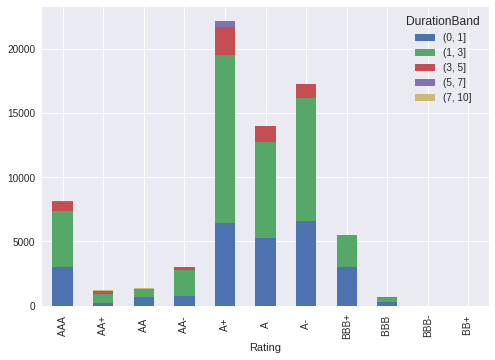

In [369]:
QueryData(ALLFUND2,'Market Value',6).stack().sum(level=['Rating',
'DurationBand']).unstack().reindex(ratingorder).plot(kind='bar'
,stacked=True)

In [0]:
# download to local machine
file = df.stack().sum(level=['Rating','Duration band']).unstack()
file.to_csv('file.csv')
files.download('file.csv')


In [370]:
#copy content to Google Drive
!cp ALLFUND.csv "/content/drive/My Drive/FromColab/"

cp: cannot stat 'ALLFUND.csv': No such file or directory


In [372]:
#check google drive
!ls "/content/drive/My Drive/FromColab"


ALLFUND.csv  ALLFUNDindexed.csv  ALLFUNDindexer.csv  df.csv
